In [1]:
#%% Schaltung und Simulation im Ltspice abrufen

#import subprocess
#dir_XVIIx64 = "C:/Program Files/LTC/LTspiceXVII"
#subprocess.call(dir_XVIIx64 + "\XVIIx64.exe -b ../spice/Draft_Diode_1N4148.asc")

In [2]:
#%% Import der Module und Funktionen

import numpy as np
import matplotlib.pyplot as plt

In [3]:
#%% Import, Extraktion und Bearbeitung der Spices und Redpitayas Werte 

# Load Redpitayas Data
Data_elie = np.loadtxt("../Red Pitayas Messwerte/rpScopeData_elie1_Diode_1N4001.txt", delimiter = ",")
TIME_elie = Data_elie[:,0]                   # Time in ms
IN1_elie = (1/5)*np.array(Data_elie[:,1])    # Eingangspannung in V
IN2_elie = (1/5)*np.array(Data_elie[:,2])    # Diodenspannung in V
MATH_elie = 5*np.array(Data_elie[:,3])       # Diodenstrom in mA

# Rundung der Redpitayas Data
TIME_elie_gerundet = []
IN1_elie_gerundet = []
IN2_elie_gerundet = []
MATH_elie_gerundet = []
for i in range(0, len(TIME_elie)):
    TIME_elie_gerundet.append(round((TIME_elie[i]), 3))
    IN1_elie_gerundet.append(round((IN1_elie[i]), 3))
    IN2_elie_gerundet.append(round((IN2_elie[i]), 3))
    MATH_elie_gerundet.append(round((MATH_elie[i]), 3))

# Load Spice-Data
Data_Spice = np.loadtxt("../Spice-Messwerte/Draft_Diode_1N4001.txt", delimiter = "\t")
TIME_Spice = 1000*np.array(Data_Spice[:,0])  # Time in ms
IN1_Spice = Data_Spice[:,1]                  # Eingangspannung in V
IN2_Spice = Data_Spice[:,2]                  # Diodenspannung in V
MATH_Spice = 1000*np.array(Data_Spice[:,3])  # Diodenstrom in mA

# Rundung der Spice-Data
TIME_Spice_gerundet = []
IN1_Spice_gerundet = []
IN2_Spice_gerundet = []
MATH_Spice_gerundet = []
for i in range(0, len(TIME_Spice)):
    TIME_Spice_gerundet.append(round((TIME_Spice[i]), 3))
    IN1_Spice_gerundet.append(round((IN1_Spice[i]), 3))
    IN2_Spice_gerundet.append(round((IN2_Spice[i]), 3))
    MATH_Spice_gerundet.append(round((MATH_Spice[i]), 3))

# Abgrenzung des Simulationsbereichs in Spice
TIME_Spice_abgegrenzt = []
IN1_Spice_abgegrenzt = []
IN2_Spice_abgegrenzt = []
MATH_Spice_abgegrenzt = []
for n in range(TIME_Spice_gerundet.index(0), TIME_Spice_gerundet.index(1)+1):
    TIME_Spice_abgegrenzt.append(TIME_Spice_gerundet[n])
    IN1_Spice_abgegrenzt.append(IN1_Spice_gerundet[n])
    IN2_Spice_abgegrenzt.append(IN2_Spice_gerundet[n])
    MATH_Spice_abgegrenzt.append(MATH_Spice_gerundet[n])

# Abgrenzung des Simulationsbereichs in Red Pitaya
TIME_elie_abgegrenzt = []
IN1_elie_abgegrenzt = []
IN2_elie_abgegrenzt = []
MATH_elie_abgegrenzt = []
for m in range(TIME_elie_gerundet.index(1), TIME_elie_gerundet.index(0)+1):
    TIME_elie_abgegrenzt.append(TIME_elie_gerundet[m])
    IN1_elie_abgegrenzt.append(IN1_elie_gerundet[m])
    IN2_elie_abgegrenzt.append(IN2_elie_gerundet[m])
    MATH_elie_abgegrenzt.append(MATH_elie_gerundet[m])

# Auswahl der Spice-Werte, die wir vergleichen werden
TIME_fuer_den_Vergleich = []
IN1_Spice_fuer_den_Vergleich = []
IN2_Spice_fuer_den_Vergleich = []
MATH_Spice_fuer_den_Vergleich = []
for j in range(0, len(TIME_Spice_gerundet)):
    if TIME_Spice_gerundet[j] in TIME_elie_gerundet and TIME_Spice_gerundet[j] != TIME_Spice_gerundet[j-1] :
        TIME_fuer_den_Vergleich.append(TIME_Spice_gerundet[j])
        IN1_Spice_fuer_den_Vergleich.append(IN1_Spice_gerundet[j])
        IN2_Spice_fuer_den_Vergleich.append(IN2_Spice_gerundet[j])
        MATH_Spice_fuer_den_Vergleich.append(MATH_Spice_gerundet[j])

# Auswahl der Red Pitayas Werte, die wir vergleichen werden
IN1_elie_fuer_den_Vergleich = []
IN2_elie_fuer_den_Vergleich = []
MATH_elie_fuer_den_Vergleich = []
for k in TIME_fuer_den_Vergleich:
    IN1_elie_fuer_den_Vergleich.append(IN1_elie_gerundet[(list(TIME_elie).index(k))])
    IN2_elie_fuer_den_Vergleich.append(IN2_elie_gerundet[(list(TIME_elie).index(k))])
    MATH_elie_fuer_den_Vergleich.append(MATH_elie_gerundet[(list(TIME_elie).index(k))]) 

In [4]:
#%% Berechnung der Abweichungen über die Zeit      
Abweichung_in_IN1 = 1000*np.array(IN1_Spice_fuer_den_Vergleich) - 1000*np.array(IN1_elie_fuer_den_Vergleich)
Abweichung_in_IN2 = 1000*np.array(IN2_Spice_fuer_den_Vergleich) - 1000*np.array(IN2_elie_fuer_den_Vergleich)
Abweichung_in_MATH = np.array(MATH_Spice_fuer_den_Vergleich) - np.array(MATH_elie_fuer_den_Vergleich)

print("max(Abweichung in IN1)=", round((max(Abweichung_in_IN1)), 3), "mV")
print("max(Abweichung in IN2)=", round((max(Abweichung_in_IN2)), 3), "mv")
print("max(Abweichung in MATH)=", round((max(Abweichung_in_MATH)), 3), "mA")

max(Abweichung in IN1)= 86.0 mV
max(Abweichung in IN2)= 32.0 mv
max(Abweichung in MATH)= 7.022 mA


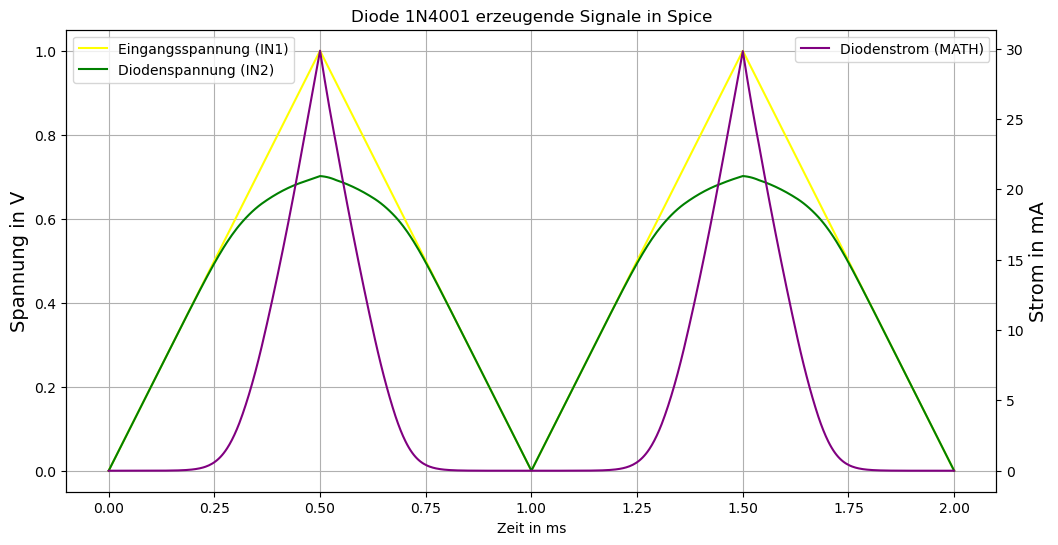

<Figure size 640x480 with 0 Axes>

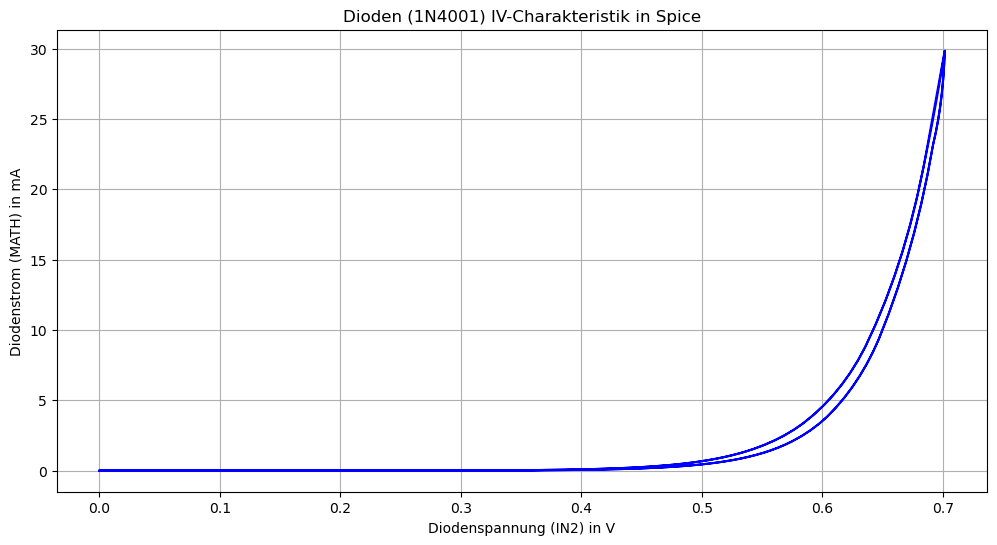

In [5]:
#%% Plot IN1, IN2, MATH, IV-Kennlinie mit Spice-Werte

# Plot Eingangs- und Diodenspanung als funktion der Zeit 
fig, ax1 = plt.subplots(figsize = (12, 6))
plt.title("Diode 1N4001 erzeugende Signale in Spice")
plt.xlabel("Zeit in ms")
plt.grid()
ax1.plot(TIME_Spice, IN1_Spice,"yellow", label = "Eingangsspannung (IN1)")
ax1.plot(TIME_Spice, IN2_Spice,"green", label = "Diodenspannung (IN2)")
ax1.set_ylabel(r"Spannung in V", fontsize = 14)
for label in ax1.get_yticklabels():
    label.set_color("black")
plt.legend(loc = "upper left")

# Plot Diodenstrom als Funktion der Zeit 
ax2 = ax1.twinx()
ax2.plot(TIME_Spice, MATH_Spice, "purple", label = "Diodenstrom (MATH)")
ax2.set_ylabel(r"Strom in mA", fontsize = 14)
for label in ax2.get_yticklabels():
    label.set_color("black")
plt.legend(loc = "upper right" )
plt.show()

# PLot IV-Kennlinie (Diodenstrom als Funktion der Diodenspannung)
plt.figure(2)
plt.figure(figsize = (12, 6))
plt.title("Dioden (1N4001) IV-Charakteristik in Spice")
plt.plot(IN2_Spice, MATH_Spice, "blue")
plt.xlabel("Diodenspannung (IN2) in V")
plt.ylabel("Diodenstrom (MATH) in mA")
plt.grid()
plt.show()

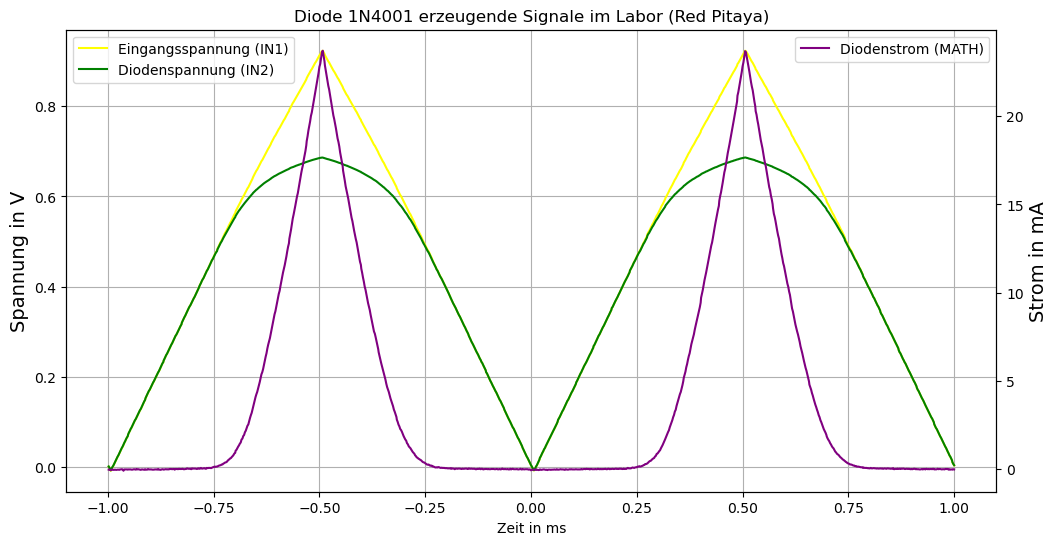

<Figure size 640x480 with 0 Axes>

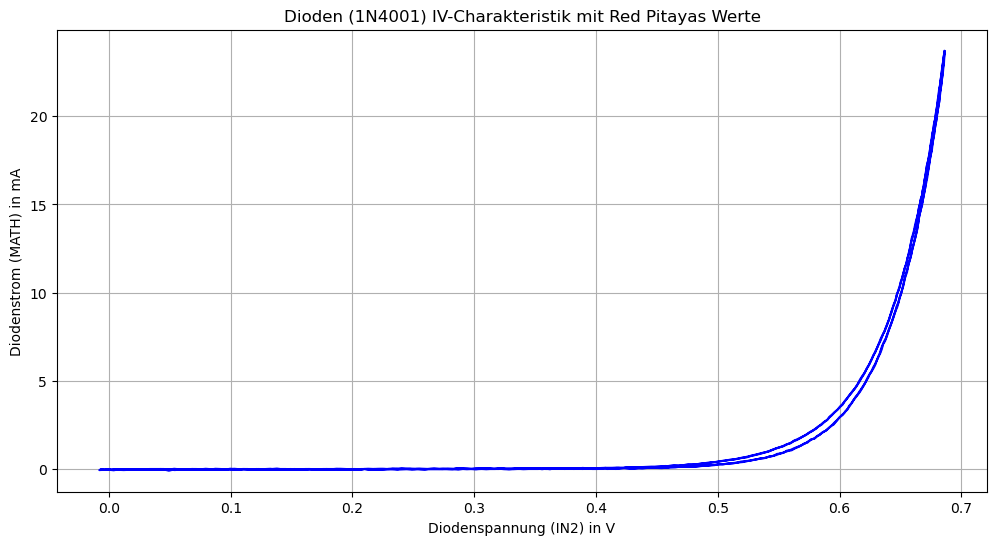

In [6]:
#%% Plot IN1, IN2, MATH, IV-Kennlinie mit Red Pitayas Werte

# Plot Eingangs- und Diodenspanung als funktion der Zeit
fig, ax1 = plt.subplots(figsize = (12, 6))
plt.title("Diode 1N4001 erzeugende Signale im Labor (Red Pitaya)")
plt.xlabel("Zeit in ms")
plt.grid()
ax1.plot(TIME_elie, IN1_elie,"yellow", label = "Eingangsspannung (IN1)")
ax1.plot(TIME_elie, IN2_elie,"green", label = "Diodenspannung (IN2)")
ax1.set_ylabel(r"Spannung in V", fontsize = 14)
for label in ax1.get_yticklabels():
    label.set_color("black")
plt.legend(loc = "upper left")

# Plot Diodenstrom als Funktion der Zeit
ax2 = ax1.twinx()
ax2.plot(TIME_elie, MATH_elie, "purple", label = "Diodenstrom (MATH)")
ax2.set_ylabel(r"Strom in mA", fontsize = 14)
for label in ax2.get_yticklabels():
    label.set_color("black")
plt.legend(loc = "upper right" )
plt.show()

# PLot IV-Kennlinie (Diodenstrom als Funktion der Diodenspannung)
plt.figure(4)
plt.figure(figsize = (12, 6))
plt.title("Dioden (1N4001) IV-Charakteristik mit Red Pitayas Werte")
plt.plot(IN2_elie, MATH_elie, "blue")
plt.xlabel("Diodenspannung (IN2) in V")
plt.ylabel("Diodenstrom (MATH) in mA")
plt.grid()
plt.show()

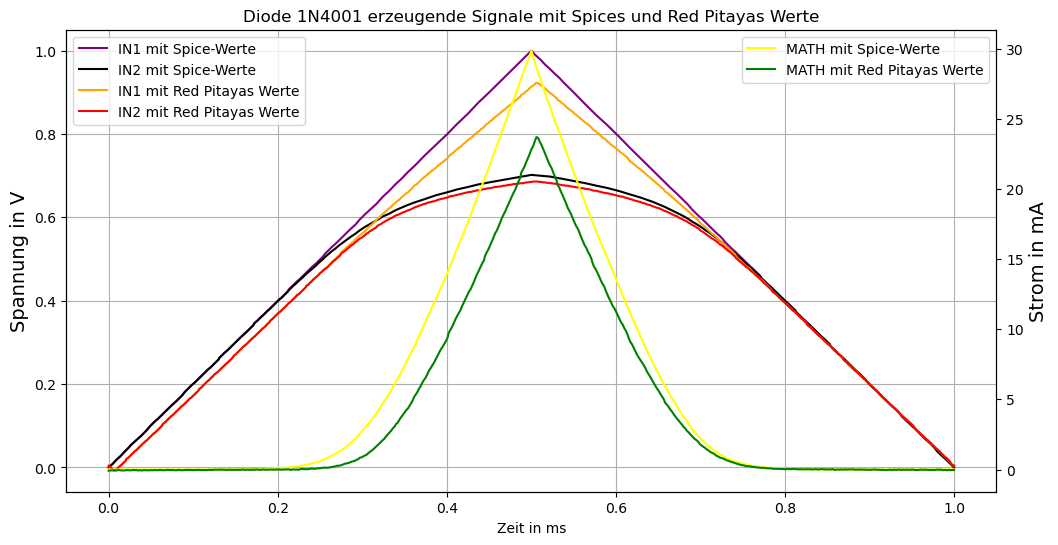

<Figure size 640x480 with 0 Axes>

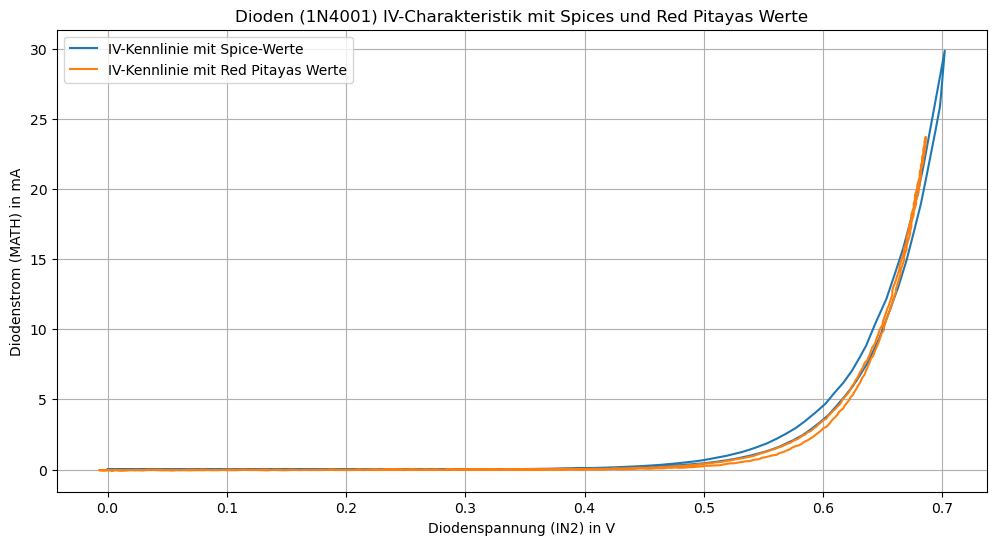

In [7]:
#%% Plot IN1, IN2 und MATH mit Spices und Red Pitayas Werte in einem gleichen Fernster

# Plot Eingangs- und Diodenspanungen (IN1_Spice, IN2_Spice, IN1_elie, IN2_elie)
fig, ax1 = plt.subplots(figsize = (12, 6))
plt.title("Diode 1N4001 erzeugende Signale mit Spices und Red Pitayas Werte")
plt.xlabel("Zeit in ms")
plt.grid()
ax1.plot(TIME_Spice_abgegrenzt, IN1_Spice_abgegrenzt, "purple", label = "IN1 mit Spice-Werte")
ax1.plot(TIME_Spice_abgegrenzt, IN2_Spice_abgegrenzt, "black", label = "IN2 mit Spice-Werte")
ax1.plot(TIME_elie_abgegrenzt, IN1_elie_abgegrenzt, "orange", label = "IN1 mit Red Pitayas Werte")
ax1.plot(TIME_elie_abgegrenzt, IN2_elie_abgegrenzt, "red", label = "IN2 mit Red Pitayas Werte")
ax1.set_ylabel(r"Spannung in V", fontsize = 14)
for label in ax1.get_yticklabels():
    label.set_color("black")
plt.legend(loc = "upper left")

# Plot Diodenstroeme (MATH_Spice und MATH_elie) 
ax2 = ax1.twinx()
ax2.plot(TIME_Spice_abgegrenzt, MATH_Spice_abgegrenzt, "yellow", label = "MATH mit Spice-Werte")
ax2.plot(TIME_elie_abgegrenzt, MATH_elie_abgegrenzt, "green", label = "MATH mit Red Pitayas Werte")
ax2.set_ylabel(r"Strom in mA", fontsize = 14)
for label in ax2.get_yticklabels():
    label.set_color("black")
plt.legend(loc = "upper right" )
plt.show()

# PLot IV-Kennlinie mit Spices und Red Pitayas Werte in einer Figur
plt.figure(6)
plt.figure(figsize = (12, 6))
plt.title("Dioden (1N4001) IV-Charakteristik mit Spices und Red Pitayas Werte")
plt.plot(IN2_Spice_abgegrenzt, MATH_Spice_abgegrenzt, label = "IV-Kennlinie mit Spice-Werte")
plt.plot(IN2_elie_abgegrenzt, MATH_elie_abgegrenzt, label = "IV-Kennlinie mit Red Pitayas Werte")
plt.xlabel("Diodenspannung (IN2) in V")
plt.ylabel("Diodenstrom (MATH) in mA")
plt.grid()
plt.legend(loc = "upper left")
plt.show()

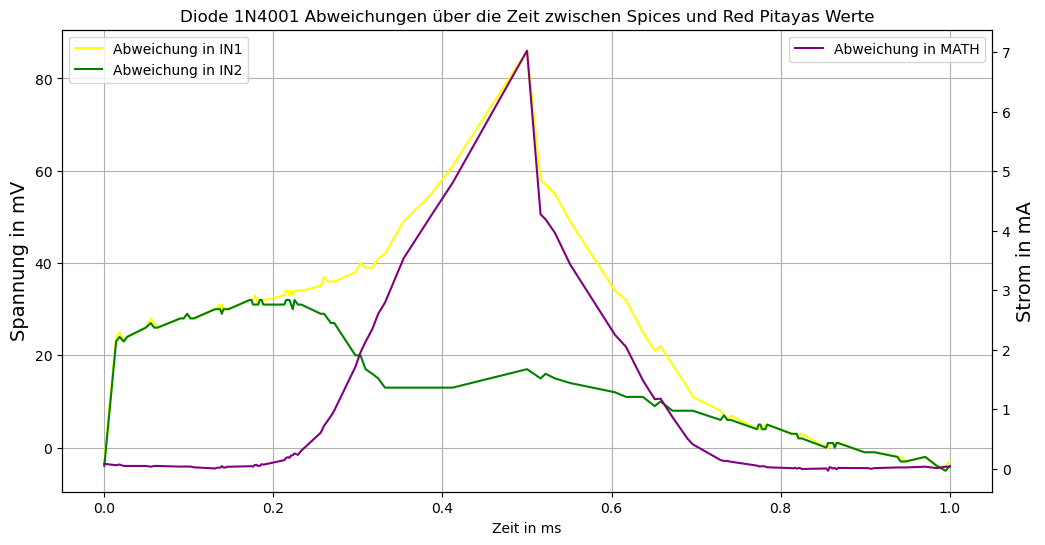

In [8]:
#%% Plot Abweichungen über die Zeit zwischen Spices und Red Pitayas Werte

# Plot Abweichungen der Eingangs- und Diodenspanung
fig, ax1 = plt.subplots(figsize = (12, 6))
plt.title("Diode 1N4001 Abweichungen über die Zeit zwischen Spices und Red Pitayas Werte")
plt.xlabel("Zeit in ms")
plt.grid()
ax1.plot(TIME_fuer_den_Vergleich, Abweichung_in_IN1, "yellow", label = "Abweichung in IN1")
ax1.plot(TIME_fuer_den_Vergleich, Abweichung_in_IN2, "green", label = "Abweichung in IN2")
ax1.set_ylabel(r"Spannung in mV", fontsize = 14)
for label in ax1.get_yticklabels():
    label.set_color("black")
plt.legend(loc = "upper left")

# Plot Abweichungen des Diodenstrom
ax2 = ax1.twinx()
ax2.plot(TIME_fuer_den_Vergleich, Abweichung_in_MATH, "purple", label = "Abweichung in MATH")
ax2.set_ylabel(r"Strom in mA", fontsize = 14)
for label in ax2.get_yticklabels():
    label.set_color("black")
plt.legend(loc = "upper right" )
plt.show()

In [9]:
#%% Schaltung und Simulation im Ltspice abrufen

#import subprocess
#dir_XVIIx64 = "C:/Program Files/LTC/LTspiceXVII"
#subprocess.call(dir_XVIIx64 + "\XVIIx64.exe -run ../spice/Draft_Diode_1N4148.asc")